## Regularization

In [734]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
import sklearn
%matplotlib inline

Like the exercises before, this notebook contains several gaps that you should complete.  All gaps are indicated by the expression \*YOUR CODE\*.

### Regularization for Simple Linear Regresion

Although linear regression is a linear machine learning method, you can have nonlinear dependencies if you transform some of the 
independent variables by a nonlinear function. By doing this, you can improve the fit of your method. Let us demonstrate this on a house price dataset. Note that this dataset is not identical with one you used in the linear regression exercise, since the those datset is too small and would cause unreliable evaluation results. 

In [735]:
dforig=pd.read_csv("kc_house_data.csv")

In [736]:
dforig

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


We would like to have a simple linear regression problem with only one independent variable. Thus, we only keep the attributes 'price' and 'sqft_living'.

In [737]:
df=dforig
df=df[["price","sqft_living"]]


To account for the bias term, we add a column containing only ones.

In [740]:
num_rows=df.shape[0]
ones=[1]*num_rows
df["bias"]=ones

C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [741]:
df

,price,sqft_living,bias
0,221900.0,1180,1
1,538000.0,2570,1
2,180000.0,770,1
3,604000.0,1960,1
4,510000.0,1680,1
5,1225000.0,5420,1
6,257500.0,1715,1
7,291850.0,1060,1
8,229500.0,1780,1
9,323000.0,1890,1


We split the data into training and test set

In [742]:
train, test = train_test_split(df, test_size=0.5)


We define a linear regression function based on the normal equation

In [743]:
def linear_regression(X,y):
    Xt=np.transpose(X)
    XtX=np.matmul(Xt,X)
    XtXm1=np.linalg.inv(XtX)
    Xty=np.matmul(Xt,y)
    thetas=np.matmul(XtXm1,Xty)
    return thetas

Let us normalize the variables.

In [744]:
max_value = train["sqft_living"].max()
min_value = train["sqft_living"].min()
train["sqft_living"] = (train["sqft_living"] - min_value) / (max_value - min_value)
X=train[["bias","sqft_living"]]

test["sqft_living"]=(test["sqft_living"]-min_value) / (max_value - min_value)

max_value=train["price"].max()
min_value=train["price"].min()
train["price"] = (train["price"] - min_value) / (max_value - min_value)
test["price"] = (test["price"] - min_value) / (max_value - min_value)



C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [745]:
train


,price,sqft_living,bias
2957,0.044590,0.089057,1
9791,0.018557,0.066415,1
2718,0.045574,0.038491,1
13393,0.049836,0.064151,1
14132,0.096393,0.133585,1
888,0.039213,0.078491,1
6946,0.075403,0.160755,1
14434,0.089836,0.215094,1
5868,0.054426,0.160000,1
18456,0.022295,0.095094,1


In [746]:
y=train[["price"]]

In [747]:
y


,price
2957,0.044590
9791,0.018557
2718,0.045574
13393,0.049836
14132,0.096393
888,0.039213
6946,0.075403
14434,0.089836
5868,0.054426
18456,0.022295


We apply linear regression to obtain the optimal parameters $\theta$.

In [748]:
thetas=linear_regression(X,y)

In [749]:
thetas

array([[-0.00473924],
       [ 0.4858674 ]])

Using X and the estimated thetas, we can predict the house prices by means of a straight line

In [725]:
ypred=np.matmul(X,thetas)

In [726]:
ypred

array([[0.06967547],
       [0.18023784],
       [0.10443421],
       ...,
       [0.07300344],
       [0.01310008],
       [0.0608009 ]])

Let us plot actual and predicted house prices.

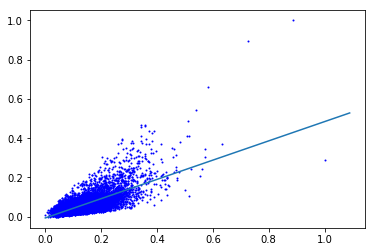

In [727]:
plt.plot(train["sqft_living"],y,'bo',markersize=1)
xs = np.arange(0,1.1,0.01)
lenxs=xs.shape[0]
ones=[1]*lenxs
Xnt=np.stack((ones,xs))
Xn=np.transpose(Xnt)
ypred=np.matmul(Xn,thetas)
plt.plot(xs,ypred)

Now let us check how the obtained parameter perform on the test set.

In [729]:
*YOUR CODE*
r2= r2_score(y_test, *YOUR CODE*)
print ("R2: ",r2)

R2:  0.48730251499832977


Now we aim to improve the fit by adding $x^2$ as additional independent variable.

thetas:  [[0.01424262]
 [0.21905883]
 [0.7183271 ]]
Xn:  [[1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0000e-02 1.0000e-04]
 [1.0000e+00 2.0000e-02 4.0000e-04]
 [1.0000e+00 3.0000e-02 9.0000e-04]
 [1.0000e+00 4.0000e-02 1.6000e-03]
 [1.0000e+00 5.0000e-02 2.5000e-03]
 [1.0000e+00 6.0000e-02 3.6000e-03]
 [1.0000e+00 7.0000e-02 4.9000e-03]
 [1.0000e+00 8.0000e-02 6.4000e-03]
 [1.0000e+00 9.0000e-02 8.1000e-03]
 [1.0000e+00 1.0000e-01 1.0000e-02]
 [1.0000e+00 1.1000e-01 1.2100e-02]
 [1.0000e+00 1.2000e-01 1.4400e-02]
 [1.0000e+00 1.3000e-01 1.6900e-02]
 [1.0000e+00 1.4000e-01 1.9600e-02]
 [1.0000e+00 1.5000e-01 2.2500e-02]
 [1.0000e+00 1.6000e-01 2.5600e-02]
 [1.0000e+00 1.7000e-01 2.8900e-02]
 [1.0000e+00 1.8000e-01 3.2400e-02]
 [1.0000e+00 1.9000e-01 3.6100e-02]
 [1.0000e+00 2.0000e-01 4.0000e-02]
 [1.0000e+00 2.1000e-01 4.4100e-02]
 [1.0000e+00 2.2000e-01 4.8400e-02]
 [1.0000e+00 2.3000e-01 5.2900e-02]
 [1.0000e+00 2.4000e-01 5.7600e-02]
 [1.0000e+00 2.5000e-01 6.2500e-02]
 [1.000

C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


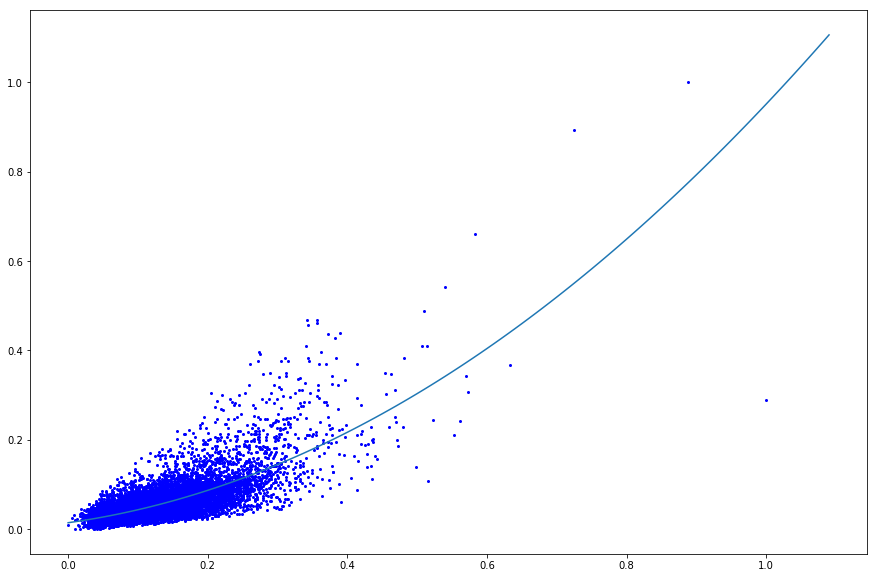

In [732]:
dfx2=train
dfx2["sqft_living^2"]=dfx2["sqft_living"]*dfx2["sqft_living"]

X=dfx2[["bias","sqft_living","sqft_living^2"]]
thetas=linear_regression(X,y)
Xn=np.stack((ones,xs,xs*xs))
ypred=np.matmul(Xn,thetas)
plt.figure(figsize=(15,10))
plt.plot(dfx2["sqft_living"],y,'bo',markersize=2)
plt.plot(xs,ypred)


Again, we determine the R2 score on the test set. Note that depending on your random split, the obtained R2 score can vary.

In [733]:
*YOUR CODE*
r2= *YOUR CODE*
print ("R2: ",r2)

R2:  0.5324553130323055


If we add higher order polynomials, the graph begins to overfit. Try adding $x^3$, $x^4$, and $x^5$ as 3 additional independent variables.

thetas:  [[ 0.02186732]
 [ 0.1686775 ]
 [-0.27376535]
 [ 5.10688624]
 [-9.014942  ]
 [ 5.00545504]]
Xn:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e-02 1.00000000e-04 1.00000000e-06
  1.00000000e-08 1.00000000e-10]
 [1.00000000e+00 2.00000000e-02 4.00000000e-04 8.00000000e-06
  1.60000000e-07 3.20000000e-09]
 [1.00000000e+00 3.00000000e-02 9.00000000e-04 2.70000000e-05
  8.10000000e-07 2.43000000e-08]
 [1.00000000e+00 4.00000000e-02 1.60000000e-03 6.40000000e-05
  2.56000000e-06 1.02400000e-07]
 [1.00000000e+00 5.00000000e-02 2.50000000e-03 1.25000000e-04
  6.25000000e-06 3.12500000e-07]
 [1.00000000e+00 6.00000000e-02 3.60000000e-03 2.16000000e-04
  1.29600000e-05 7.77600000e-07]
 [1.00000000e+00 7.00000000e-02 4.90000000e-03 3.43000000e-04
  2.40100000e-05 1.68070000e-06]
 [1.00000000e+00 8.00000000e-02 6.40000000e-03 5.12000000e-04
  4.09600000e-05 3.27680000e-06]
 [1.00000000e+00 9.00000000e-02 8.100000

C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


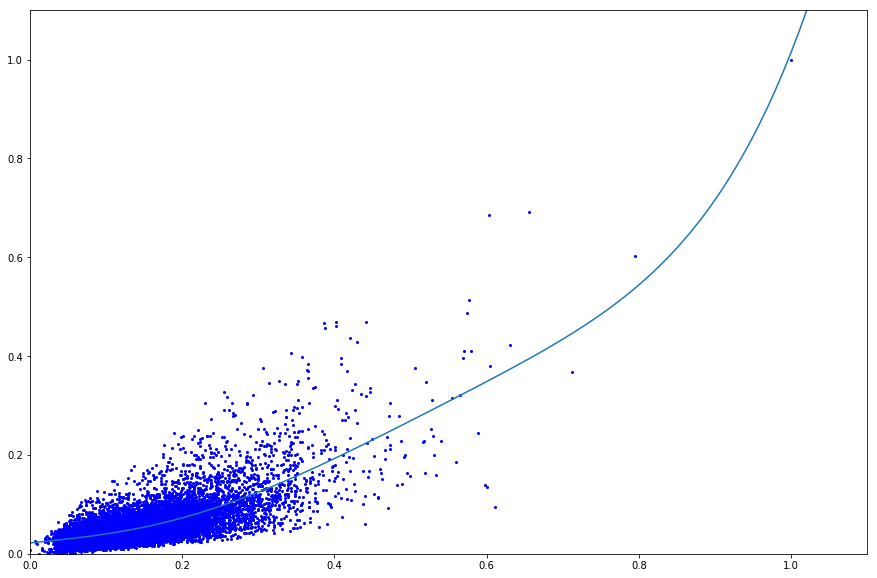

In [706]:
*YOUR CODE* 
ypred=*YOUR CODE* 
plt.figure(figsize=(15,10))
plt.xlim(0,1.1)
plt.ylim(0, 1.1)
plt.plot(dfx2["sqft_living"],y,'bo',markersize=2)
plt.plot(xs,ypred)




Now again, determine the R2 for the new parameter set $\theta$ on the test set.
You see, that often, the $R^2$ is already worse than for the previous parameter vector.

In [707]:
*YOUR CODE*
r2= *YOUR CODE*
print ("R2: ",r2)

R2:  0.4709434990142777


Now add $x^6$, $x^7$, $x^8$, $x^9$ and $x^{10}$.

C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


thetas:  [[-2.24563743e-02]
 [ 2.90968746e+00]
 [-6.60504280e+01]
 [ 8.22330459e+02]
 [-5.87426013e+03]
 [ 2.56256664e+04]
 [-6.96987822e+04]
 [ 1.17941823e+05]
 [-1.20168366e+05]
 [ 6.72683190e+04]
 [-1.58525676e+04]]


C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


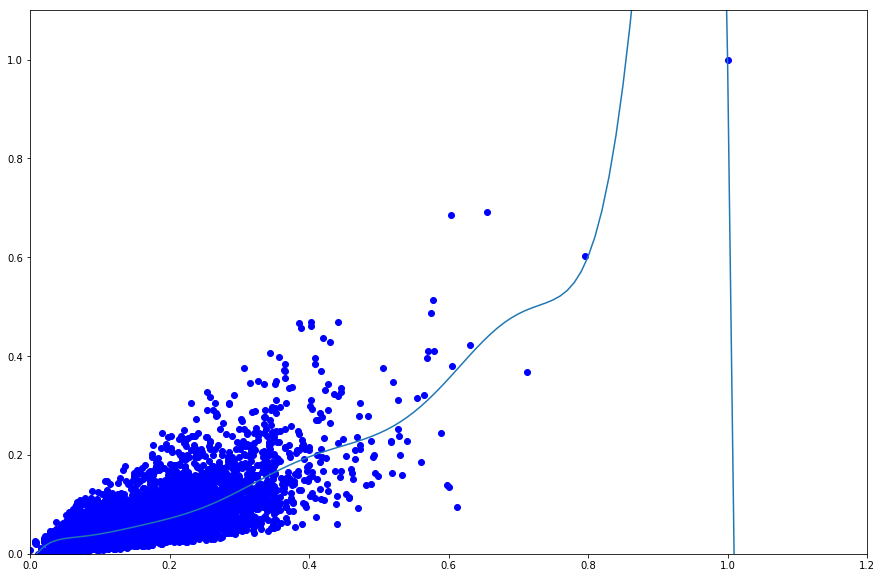

In [708]:
*YOUR CODE*
ypred=*YOUR CODE*

plt.figure(figsize=(15,10))
plt.xlim(0,1.2)
plt.ylim(0, 1.1)
plt.plot(dfx2["sqft_living"],y,'bo',markersize=2)
plt.plot(xs,ypred)

Again we determine the $R^2$ on the test set, which is rather poor in average.

In [670]:
*YOUR CODE*
r2= *YOUR CODDE*
print ("R2: ",r2)

R2:  -0.4627482558259892


The effect of overfitting can be reduced by regularization. Implement the regularized version of linear regression: $\Theta:=(X^{\top}X+\lambda \begin{bmatrix}
    0  & 0 &\ldots&0 \\
    0 & 1 & \\
    \ldots & & \ddots & \\
    0& & & 1
  \end{bmatrix} )^{-1}(X^{\top}y)$

In [671]:
def linear_regression_reg(X,y,lambda):
    *YOUR CODE*
    return thetas

We now plot the graph using the regularized parameter vectors. As you can see, the effect of overfitting is strongly reduced.

In [672]:
thetas=linear_regression_reg(*YOUR CODE*,*YOUR CODE*,4)

In [673]:
thetas

array([[ 0.00883831],
       [ 0.3683208 ],
       [ 0.31309647],
       [ 0.16011192],
       [ 0.06189231],
       [ 0.00678568],
       [-0.02498944],
       [-0.04443152],
       [-0.05697208],
       [-0.06537236],
       [-0.07114087]])

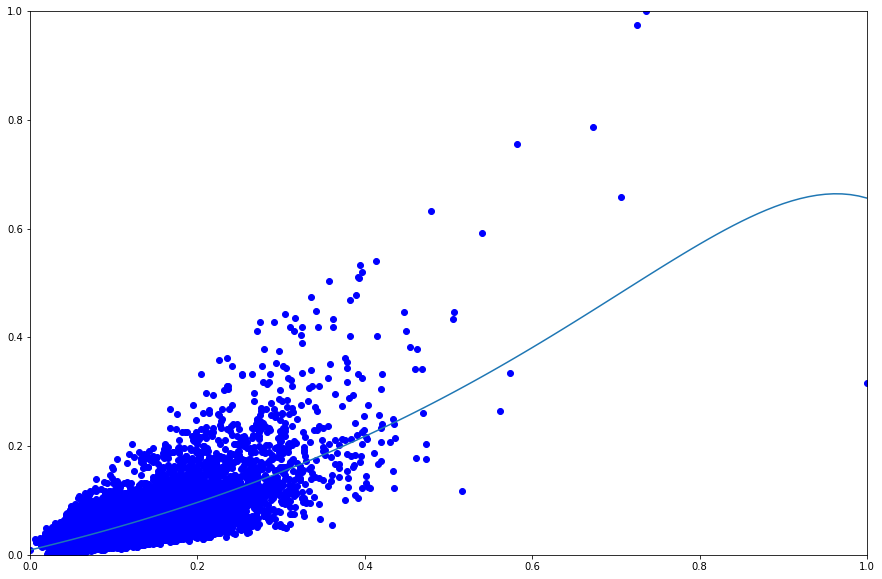

In [675]:
ypred=np.matmul(*YOUR CODE*,thetas)

plt.figure(figsize=(15,10))
plt.xlim(0,1)
plt.ylim(0, 1)
plt.plot(dfx2["sqft_living"],y,'bo',markersize=2)
plt.plot(xs,ypred)

Let us determine the $R^2$ on the test set again.

In [676]:
*YOUR CODE*
r2= *YOUR CODE*
print ("R2: ",r2)

R2:  0.5188565897731041


You should see that the $R^2$ is much higher than for the unregularized parameter set.

Another benefit of regularization is that it can help in case of numerical issues. Let us consider our original dataset.

In [677]:
dforig=pd.read_csv("kc_house_data.csv")
df=dforig[["price","sqft_living","bedrooms"]]

max_value = df["sqft_living"].max()
min_value = df["sqft_living"].min()
df["Size"] = (df["sqft_living"] - min_value) / (max_value - min_value)

max_value = df["bedrooms"].max()
min_value = df["bedrooms"].min()
df["bedrooms"] = (df["bedrooms"] - min_value) / (max_value - min_value)

max_value=df["price"].max()
min_value=df["price"].min()
df["price"] = (df["price"] - min_value) / (max_value - min_value)




C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\JumpStart\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

To make the feature matrix $X^{\top}X$ singular, we just add  another independent variable (sqft_living2) to X
that amounts to just twice sqft_living.

In [678]:
df=dforig
df["sqft_living2"]=2*df["sqft_living"]
num_rows=df.shape[0]
df["ones"]=[1]*num_rows
X=df[["ones","sqft_living","bedrooms","sqft_living2"]]

In [680]:
y=df[["price"]]

We see that the linear regression fails, since $X^{\top}X$ is not invertible.

In [681]:
thetas=linear_regression(X,y)

LinAlgError: Singular matrix

There are two possiblities to tackle this issue, the first one is to use the pseudoinverse instead of the inverse
and the second one is using regularization. Try out both.

In [ ]:
*YOUR CODE*

thetas1=*YOUR CODE*
print ("thetas obtained by linear regression with pseudoinverse: ",thetas1)

In [ ]:
thetas2=*YOUR CODE*
print ("thetas obtained by linear regression with regularization: ",thetas2)

### Regularization with logistic regression 

Now let us apply regularization to a larger dataset using sklearn, for which we reuse the ezcema dataset from the last exercise.

In [493]:
df=pd.read_csv("skin_disease.csv")
di = {1: 0, 255: 2}
df=df.replace({"class": di})
di = {2: 1}
df=df.replace({"class": di})
del df["x"]
del df["y"]
del df["expertsEczemaVotePatch"]
del df["expertsEczemaAllVotePatch"]
del df["expertsEczemaVoteCenterPixel"]

We again split the data into training and test set.

In [494]:
train, test = train_test_split(df, test_size=0.2)
X_train = train.drop('class', axis=1)
X_test = test.drop('class', axis=1)

y_train = train["class"]
y_test = test["class"]


We systematically try out all regularization parameters in the interval [0,2] with step size 0.1, a technique also known as grid search.

In [495]:

for i in range(1,21):
    c=i*0.1
    logReg=*YOUR CODE* #use sklearn here
    *YOUR CODE*
    y_pred_test=*YOUR CODE*
    accuracy=*YOUR CODE*
    fscore=*YOUR CODE*
    print ("C: ",c," accuracy: ",accuracy, "f1 score: ",fscore)
    


C:  0.1  accuracy:  0.928 f1 score:  0.522229595222296
C:  0.2  accuracy:  0.9289 f1 score:  0.5299484331614438
C:  0.30000000000000004  accuracy:  0.92922 f1 score:  0.5318783068783068
C:  0.4  accuracy:  0.9295 f1 score:  0.5343461030383091
C:  0.5  accuracy:  0.92831 f1 score:  0.5255145939506254
C:  0.6000000000000001  accuracy:  0.92897 f1 score:  0.5313097987462885
C:  0.7000000000000001  accuracy:  0.92806 f1 score:  0.5226910828025477
C:  0.8  accuracy:  0.93168 f1 score:  0.5546284224250326
C:  0.9  accuracy:  0.92797 f1 score:  0.5227588948519181
C:  1.0  accuracy:  0.9316 f1 score:  0.5531748105565717
C:  1.1  accuracy:  0.92973 f1 score:  0.5371797404992426
C:  1.2000000000000002  accuracy:  0.93118 f1 score:  0.5504311471126208
C:  1.3  accuracy:  0.92746 f1 score:  0.5162710056014936
C:  1.4000000000000001  accuracy:  0.9285 f1 score:  0.5256104033970277
C:  1.5  accuracy:  0.93153 f1 score:  0.5537960247637668
C:  1.6  accuracy:  0.93203 f1 score:  0.5578036562357687
C: 

One final remark, in this notebook we used for simplicity skin pixels from the same image for training and testing.
In real world scenarios, the test and training data set should originate from different images, 
since skin pixels from the same image are highly correlated and your evaluation measure values would therefore 
probably be too high.